### Light BGM for Bandgap Prediction

In [73]:
#pip install lightgbm

In [74]:
import warnings
warnings.filterwarnings("ignore")
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

### Processing Data

In [75]:
# df = pd.read_csv('../data/x_y_bandgap_normalized.csv')
bandgap = pd.read_csv('../data/x_y_bandgap_normalized.csv')
formation = pd.read_csv('../data/x_y_formation_normalized.csv')
raw_bandgap = pd.read_csv('../data/bandgap_23_features.csv')
raw_formation = pd.read_csv('../data/formation_energy_18_features.csv')

In [76]:
X_formation = formation.drop(columns=['formation_energy'])
y_formation = formation['formation_energy']
X_formation_train, X_formation_test, y_formation_train, y_formation_test= train_test_split(X_formation, 
                                                                                           y_formation, 
                                                                                           test_size=0.15, 
                                                                                           random_state=42
                                                                                           )

X_formation_train, X_formation_val, y_formation_train, y_formation_val = train_test_split(X_formation_train, 
                                                                                          y_formation_train,
                                                                                            test_size=0.15,
                                                                                            random_state=42
                                                                                            )

In [77]:
train_formation = lgb.Dataset(X_formation_train, label=y_formation_train)
val_formation = lgb.Dataset(X_formation_val, label=y_formation_val, reference=train_formation)
test_formation = lgb.Dataset(X_formation_test, label=y_formation_test, reference=train_formation)

In [78]:
X_formation_raw = raw_formation.drop(columns=['formation_energy'])
y_formation_raw = raw_formation['formation_energy']
X_formation_train_raw, X_formation_test_raw, y_formation_train_raw, y_formation_test_raw= train_test_split(X_formation_raw, 
                                                                                           y_formation_raw, 
                                                                                           test_size=0.15, 
                                                                                           random_state=42
                                                                                           )

X_formation_train_raw, X_formation_val_raw, y_formation_train_raw, y_formation_val_raw = train_test_split(X_formation_train_raw, 
                                                                                          y_formation_train_raw,
                                                                                            test_size=0.15,
                                                                                            random_state=42
                                                                                            )
scaler_formation = MinMaxScaler()
X_formation_train_raw = scaler_formation.fit_transform(X_formation_train_raw)   # fit + transform
X_formation_val_raw   = scaler_formation.transform(X_formation_val_raw)         # transform only
X_formation_test_raw  = scaler_formation.transform(X_formation_test_raw)        # transform only

In [79]:
train_formation_raw = lgb.Dataset(X_formation_train_raw, label=y_formation_train_raw)
val_formation_raw = lgb.Dataset(X_formation_val_raw, label=y_formation_val_raw, reference=train_formation_raw)
test_formation_raw = lgb.Dataset(X_formation_test_raw, label=y_formation_test_raw, reference=train_formation_raw)

In [80]:
X_bandgap = bandgap.drop(columns=['band_gap'])
y_bandgap = bandgap['band_gap']
X_bandgap_train, X_bandgap_test, y_bandgap_train, y_bandgap_test= train_test_split(X_bandgap, 
                                                                                       y_bandgap, 
                                                                                       test_size=0.15, 
                                                                                       random_state=42
                                                                                       )
X_bandgap_train, X_bandgap_val, y_bandgap_train, y_bandgap_val = train_test_split(X_bandgap_train, 
                                                                                        y_bandgap_train,
                                                                                        test_size=0.15,
                                                                                        random_state=42
                                                                                        )

In [81]:
train_bandgap= lgb.Dataset(X_bandgap_train, label=y_bandgap_train)
val_bandgap = lgb.Dataset(X_bandgap_val, label=y_bandgap_val, reference=train_bandgap)
test_bandgap = lgb.Dataset(X_bandgap_test, label=y_bandgap_test, reference=train_bandgap)

In [82]:
X_bandgap_raw = raw_bandgap.drop(columns=['band_gap'])
y_bandgap_raw = raw_bandgap['band_gap']
X_bandgap_train_raw, X_bandgap_test_raw, y_bandgap_train_raw, y_bandgap_test_raw= train_test_split(X_bandgap_raw, 
                                                                                       y_bandgap_raw, 
                                                                                       test_size=0.15, 
                                                                                       random_state=42
                                                                                       )
X_bandgap_train_raw, X_bandgap_val_raw, y_bandgap_train_raw, y_bandgap_val_raw = train_test_split(X_bandgap_train_raw, 
                                                                                        y_bandgap_train_raw,
                                                                                        test_size=0.15,
                                                                                        random_state=42
                                                                                        )
scaler_bandgap = MinMaxScaler()
X_bandgap_train_raw = scaler_bandgap.fit_transform(X_bandgap_train_raw)   # fit + transform
X_bandgap_val_raw   = scaler_bandgap.transform(X_bandgap_val_raw)         # transform only
X_bandgap_test_raw  = scaler_bandgap.transform(X_bandgap_test_raw)        # transform only

In [83]:
train_bandgap_raw = lgb.Dataset(X_bandgap_train_raw, label=y_bandgap_train_raw)
val_bandgap_raw = lgb.Dataset(X_bandgap_val_raw, label=y_bandgap_val_raw, reference=train_bandgap_raw)
test_bandgap_raw = lgb.Dataset(X_bandgap_test_raw, label=y_bandgap_test_raw, reference=train_bandgap_raw)

## Training Band gap model
### Using our processed features

In [43]:
best_params_bandgap = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': 10,
    'n_estimators': 300,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'reg_alpha': 0.5,
    'reg_lambda': 0,
    'verbose': -1
}

bst_bandgap = lgb.train(
    best_params_bandgap, 
    train_bandgap,  
    valid_sets=[val_bandgap], 
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
    # early_stopping_rounds=50, 
    # verbose_eval=False
)
y_pred_bandgap_train = bst_bandgap.predict(X_bandgap_train, num_iteration=bst_bandgap.best_iteration)
y_pred_bandgap_val = bst_bandgap.predict(X_bandgap_val, num_iteration=bst_bandgap.best_iteration)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[182]	valid_0's rmse: 0.77393


In [101]:
print("Bandgap Training Results:")
print("RMSE:", mean_squared_error(y_bandgap_train, y_pred_bandgap_train))
print("MAE:", mean_absolute_error(y_bandgap_train, y_pred_bandgap_train))
print("R2 Score:", r2_score(y_bandgap_train, y_pred_bandgap_train))

print("\nBandgap Validation Results:")
print("RMSE:", mean_squared_error(y_bandgap_val, y_pred_bandgap_val))
print("MAE:", mean_absolute_error(y_bandgap_val, y_pred_bandgap_val))
print("R2 Score:", r2_score(y_bandgap_val, y_pred_bandgap_val))

Bandgap Training Results:
RMSE: 0.06913831695069442
MAE: 0.18241354427622603
R2 Score: 0.9787710709492454

Bandgap Validation Results:
RMSE: 0.5989673687116098
MAE: 0.5254759565131495
R2 Score: 0.8085559285020261


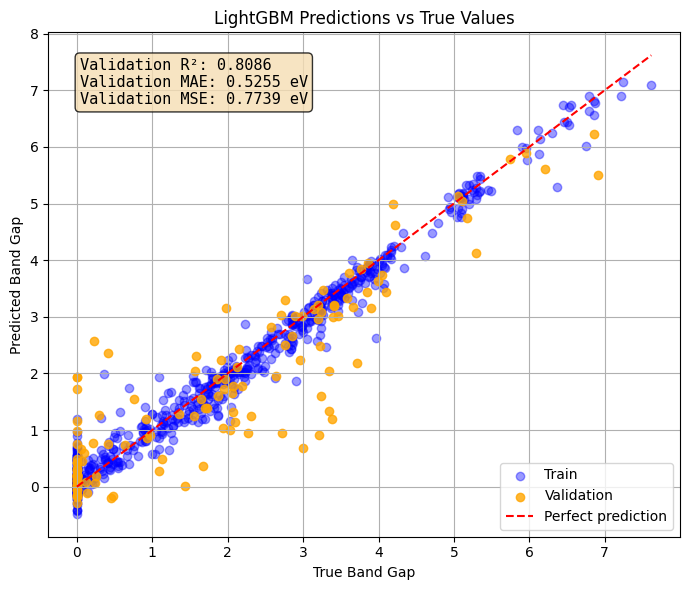

In [87]:
fig, ax = plt.subplots(figsize=(7, 6))

# Training set
ax.scatter(y_bandgap_train, y_pred_bandgap_train, 
           label='Train', alpha=0.4, color='blue')

# Validation set
ax.scatter(y_bandgap_val, y_pred_bandgap_val, 
           label='Validation', alpha=0.8, color='orange')

# Perfect prediction line
low = min(min(y_bandgap_train), min(y_bandgap_val))
high = max(max(y_bandgap_train), max(y_bandgap_val))
ax.plot([low, high], [low, high], '--k', color = 'red', label='Perfect prediction')

# Labels
ax.set_xlabel("True Band Gap")
ax.set_ylabel("Predicted Band Gap")
ax.set_title("LightGBM Predictions vs True Values")
ax.legend(loc='lower right')
ax.grid(True)

# Metrics
rmse = np.sqrt(mean_squared_error(y_bandgap_val, y_pred_bandgap_val))
r2 = r2_score(y_bandgap_val, y_pred_bandgap_val)
mae = mean_absolute_error(y_bandgap_val, y_pred_bandgap_val)

textstr = (
    f'Validation R²: {r2:.4f}\n'
    f'Validation MAE: {mae:.4f} eV\n'
    f'Validation MSE: {rmse:.4f} eV'
)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=props, family='monospace')

plt.tight_layout()
plt.show()


### Using paper's features

In [97]:
best_params_bandgap_raw = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 15,
    'max_depth': 8,
    'n_estimators': 500,
    'subsample': 1.0,
    'colsample_bytree': 0.6,
    'reg_alpha': 0.1,
    'reg_lambda': 0,
    'verbose': -1
}
{'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'num_leaves': 15, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

bst_bandgap_raw = lgb.train(
    best_params_bandgap_raw, 
    train_bandgap_raw,  
    valid_sets=[val_bandgap_raw], 
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
    # early_stopping_rounds=50, 
    # verbose_eval=False
)

y_pred_bandgap_train_raw = bst_bandgap_raw.predict(X_bandgap_train_raw, num_iteration=bst_bandgap_raw.best_iteration)
y_pred_bandgap_val_raw = bst_bandgap_raw.predict(X_bandgap_val_raw, num_iteration=bst_bandgap_raw.best_iteration)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[191]	valid_0's rmse: 0.812838


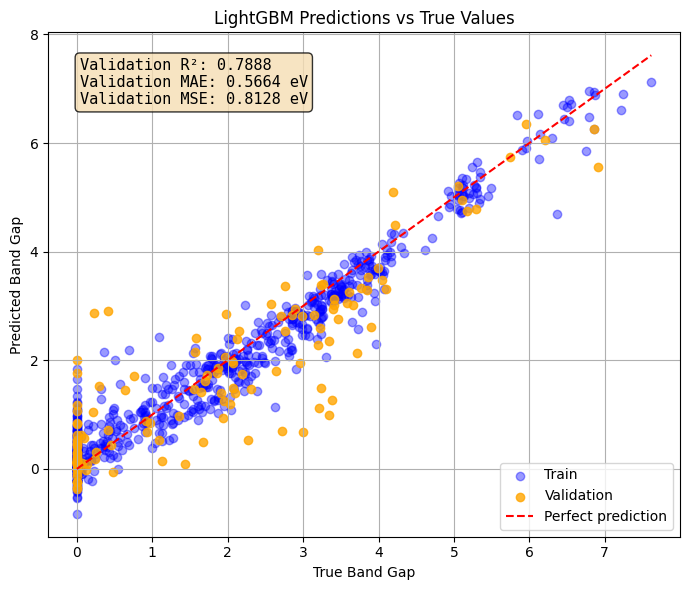

In [98]:
fig, ax = plt.subplots(figsize=(7, 6))

# Training set
ax.scatter(y_bandgap_train_raw, y_pred_bandgap_train_raw, 
           label='Train', alpha=0.4, color='blue')

# Validation set
ax.scatter(y_bandgap_val_raw, y_pred_bandgap_val_raw, 
           label='Validation', alpha=0.8, color='orange')

# Perfect prediction line
low = min(min(y_bandgap_train_raw), min(y_bandgap_val_raw))
high = max(max(y_bandgap_train_raw), max(y_bandgap_val_raw))
ax.plot([low, high], [low, high], '--k', color = 'red', label='Perfect prediction')

# Labels
ax.set_xlabel("True Band Gap")
ax.set_ylabel("Predicted Band Gap")
ax.set_title("LightGBM Predictions vs True Values")
ax.legend(loc='lower right')
ax.grid(True)

# Metrics
rmse = np.sqrt(mean_squared_error(y_bandgap_val_raw, y_pred_bandgap_val_raw))
r2 = r2_score(y_bandgap_val_raw, y_pred_bandgap_val_raw)
mae = mean_absolute_error(y_bandgap_val_raw, y_pred_bandgap_val_raw)

textstr = (
    f'Validation R²: {r2:.4f}\n'
    f'Validation MAE: {mae:.4f} eV\n'
    f'Validation MSE: {rmse:.4f} eV'
)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=props, family='monospace')

plt.tight_layout()
plt.show()



## Training Formation energy model
### Using our processed features

In [90]:
best_params_formation = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 15,
    'max_depth': 6,
    'n_estimators': 300,
    'subsample': 1.0,
    'colsample_bytree': 0.6,
    'reg_alpha': 0.1,
    'reg_lambda': 0,
    'verbose': -1
}


bst_formation = lgb.train(
    best_params_formation, 
    train_formation,  
    valid_sets=[val_formation], 
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
    # early_stopping_rounds=50, 
    # verbose_eval=False
)

y_pred_formation_train = bst_formation.predict(X_formation_train, num_iteration=bst_formation.best_iteration)
y_pred_formation_val = bst_formation.predict(X_formation_val, num_iteration=bst_formation.best_iteration)
# y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
# mse = mean_squared_error(y_test, y_pred)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[297]	valid_0's rmse: 0.164252


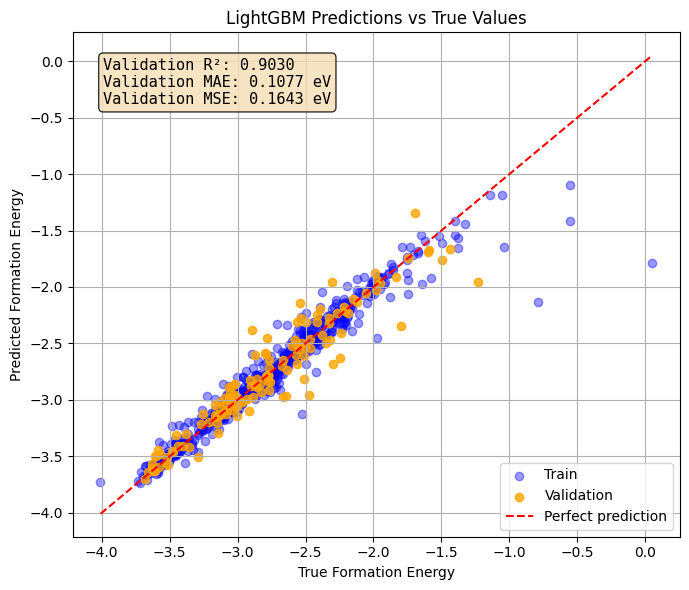

In [92]:
y_pred_formation_train = bst_formation.predict(X_formation_train, num_iteration=bst_formation.best_iteration)
y_pred_formation_val = bst_formation.predict(X_formation_val, num_iteration=bst_formation.best_iteration)
fig, ax = plt.subplots(figsize=(7, 6))

# Training set
ax.scatter(y_formation_train, y_pred_formation_train, 
           label='Train', alpha=0.4, color='blue')

# Validation set
ax.scatter(y_formation_val, y_pred_formation_val, 
           label='Validation', alpha=0.8, color='orange')

# Perfect prediction line
low = min(min(y_formation_train), min(y_formation_val))
high = max(max(y_formation_train), max(y_formation_val))
ax.plot([low, high], [low, high], '--k', color = 'red', label='Perfect prediction')

# Labels
ax.set_xlabel("True Formation Energy")
ax.set_ylabel("Predicted Formation Energy")
ax.set_title("LightGBM Predictions vs True Values")
ax.legend(loc='lower right')
ax.grid(True)

# Metrics
rmse = np.sqrt(mean_squared_error(y_formation_val, y_pred_formation_val))
r2 = r2_score(y_formation_val, y_pred_formation_val)
mae = mean_absolute_error(y_formation_val, y_pred_formation_val)

textstr = (
    f'Validation R²: {r2:.4f}\n'
    f'Validation MAE: {mae:.4f} eV\n'
    f'Validation MSE: {rmse:.4f} eV'
)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=props, family='monospace')

plt.tight_layout()
plt.show()


In [84]:
best_params_formation_raw = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 15,
    'max_depth': 6,
    'n_estimators': 300,
    'subsample': 1.0,
    'colsample_bytree': 0.6,
    'reg_alpha': 0.1,
    'reg_lambda': 0,
    'verbose': -1
}
# {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'num_leaves': 15, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.6}

bst_formation_raw = lgb.train(
    best_params_formation_raw, 
    train_formation_raw,  
    valid_sets=[val_formation_raw], 
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
    # early_stopping_rounds=50, 
    # verbose_eval=False
)

y_pred_formation_train_raw = bst_formation_raw.predict(X_formation_train_raw, num_iteration=bst_formation_raw.best_iteration)
y_pred_formation_val_raw = bst_formation_raw.predict(X_formation_val_raw, num_iteration=bst_formation_raw.best_iteration)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[293]	valid_0's rmse: 0.173995


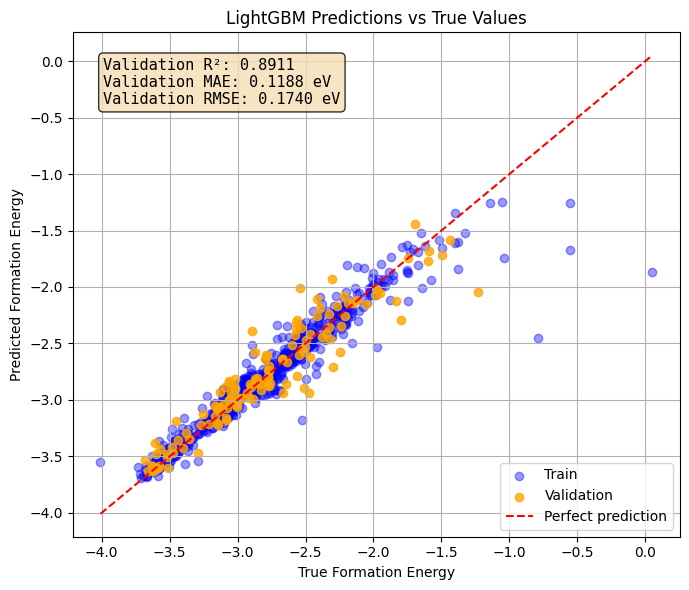

In [93]:
fig, ax = plt.subplots(figsize=(7, 6))

# Training set
ax.scatter(y_formation_train_raw, y_pred_formation_train_raw, 
           label='Train', alpha=0.4, color='blue')

# Validation set
ax.scatter(y_formation_val_raw, y_pred_formation_val_raw, 
           label='Validation', alpha=0.8, color='orange')

# Perfect prediction line
low = min(min(y_formation_train_raw), min(y_formation_val_raw))
high = max(max(y_formation_train_raw), max(y_formation_val_raw))
ax.plot([low, high], [low, high], '--k', color = 'red', label='Perfect prediction')

# Labels
ax.set_xlabel("True Formation Energy")
ax.set_ylabel("Predicted Formation Energy")
ax.set_title("LightGBM Predictions vs True Values")
ax.legend(loc='lower right')
ax.grid(True)

# Metrics
rmse = np.sqrt(mean_squared_error(y_formation_val_raw, y_pred_formation_val_raw))
r2 = r2_score(y_formation_val_raw, y_pred_formation_val_raw)
mae = mean_absolute_error(y_formation_val_raw, y_pred_formation_val_raw)

textstr = (
    f'Validation R²: {r2:.4f}\n'
    f'Validation MAE: {mae:.4f} eV\n'
    f'Validation RMSE: {rmse:.4f} eV'
)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=props, family='monospace')

plt.tight_layout()
plt.show()


In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
model = lgb.LGBMRegressor(objective='regression', metric='rmse', boosting_type='gbdt', verbose=-1)
param_dist = {
    'num_leaves': [15, 31, 63, 127],
    'max_depth': [3, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.5, 1],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]
}

# ----------------------------
# Randomized search
# ----------------------------
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,          # number of random combinations to try
    scoring='neg_root_mean_squared_error',
    cv=3,               # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_bandgap_train_raw, y_bandgap_train_raw)

# ----------------------------
# Best model and performance
# ----------------------------
best_model = random_search.best_estimator_
y_bandgap_val_pred = best_model.predict(X_bandgap_val_raw)
rmse = mean_squared_error(y_bandgap_val_raw, y_bandgap_val_pred, squared=False)
print(f"Best params: {random_search.best_params_}")
print(f"Validation RMSE: {rmse:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best params: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'num_leaves': 15, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Validation RMSE: 0.8234
